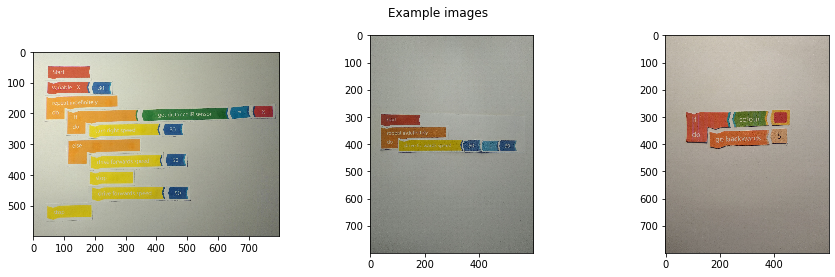

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv
from PIL import Image
import pytesseract


img_directory = '/home/vasilisp/Desktop/tangibles-recognition/test_images/'

A = np.array(Image.open(img_directory+'complex-example-tagn.jpg'))
A = cv.resize(A, dsize=(800, 600), interpolation=cv.INTER_CUBIC)
hsv_A = cv.cvtColor(A, cv.COLOR_RGB2HSV)

B = np.array(Image.open(img_directory+'no_crop.jpg'))
B = cv.resize(B, dsize=(800, 600), interpolation=cv.INTER_CUBIC)
B = np.rot90(B, k=3)
hsv_B = cv.cvtColor(B, cv.COLOR_RGB2HSV)

C = np.array(Image.open(img_directory+'well-lit.jpg'))
C = cv.resize(C, dsize=(800, 600), interpolation=cv.INTER_CUBIC)
C = np.rot90(C, k=3)
hsv_C = cv.cvtColor(C, cv.COLOR_RGB2HSV)

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Example images')
ax1.imshow(A)
ax2.imshow(B)
ax3.imshow(C)
fig.show() 

Found 17 blocks image A
 +++ ++ +++
Found 14 blocks image B
 +++ ++ +++
Found 5 blocks image C
 +++ ++ +++


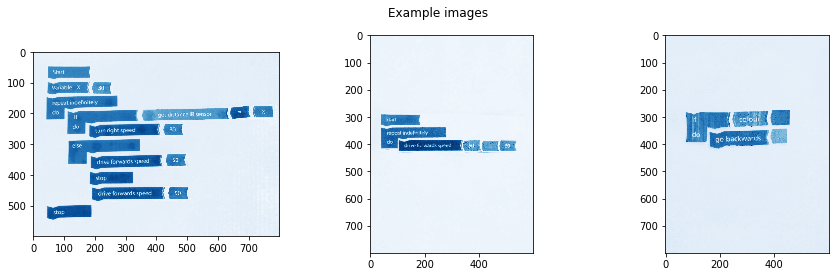

In [4]:
def find_features(img, name):
    # prints the number of features in the picture

    # Kernel that will be used in later morphological trasformations
    closing_kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))

    # threshold saturation chanel
    ret3, th_saturation = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

    # dilating thresholded image to remove letters
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (2,2))
    th_saturation = cv.dilate(th_saturation, kernel, iterations = 3)

    # using connected components (CC) method to label each block
    num_labels, labels_im = cv.connectedComponents(th_saturation)
    #plt.imshow()
    #plt.show()
    print('Found {} blocks image {}\n +++ ++ +++'.format(num_labels-1, name))

_ , A_s, _ = cv.split(hsv_A)
find_features(A_s,'A')
_ , B_s, _ = cv.split(hsv_B)
find_features(B_s,'B')
_ , C_s, _ = cv.split(hsv_C)
find_features(C_s,'C')

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Example images')
ax1.imshow(A_s, cmap='Blues')
ax2.imshow(B_s, cmap='Blues')
ax3.imshow(C_s, cmap='Blues')
fig.show() 

plt.imshow(B)
plt.show()
